In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from itertools import combinations, product
from enviroments import env_p2p
import pickle

In [14]:
#Fares disponibles
f = [500,400,300,200,100]
m = len(f) 

#Probabilidad de llegada de un comprador (arraibal probablity)
lambd = 0.3

# Parametro que modela la disponibilidad a pagar (Willnes to pay)
beta= 0.5

#Capacidad de la aeronave
C = 50

#Horizonte temporal máximo
T = 50

seats = np.arange(0, C + 1)
time = np.arange(0, T)

env = env_p2p(lambd, beta, C, T, f, model = "QL")

In [ ]:
# Cargar la matriz desde el archivo pickle
with open('results/V_value.pickle', 'rb') as archivo:
    V_value = pickle.load(archivo)

# Cargar el vector desde el archivo pickle
with open('results/Q_value.pickle', 'rb') as archivo:
    Q_value = pickle.load(archivo)

In [15]:
def select_action(Q, s, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(nA)
    return np.argmax(Q[s, :])

In [16]:
gamma = 1
alpha = 1e-4
eps = 1.0
n = 2*50
eps_decay = 0.9999995**(1/n)
max_episodes = 150000*n
max_steps = 100

In [ ]:
Rs = []
Eps = []
nS = (C+1)*T
nA = len(env.action_space)

Q = np.zeros((nS, nA))
N = np.zeros((nS, nA))

In [ ]:
with open('results/Q_QL_trayectorias.pickle', 'rb') as archivo:
    Q = pickle.load(archivo)

In [17]:


for episode in range(max_episodes):
    s, _ = env.set_initial(s = [0,0])
    R = 0
    for step in range(max_steps):
        a = select_action(Q, s, eps)
        N[s,a] += 1
        s_prime, r, done, _, _ = env.step(a)
        
        R += r
        Q[s, a] += alpha*(r + gamma*np.max(Q[s_prime, :]) - Q[s, a])

        if done:
            break
            
        s = s_prime
        eps *= eps_decay
    Rs.append(R)
    Eps.append(eps)

In [ ]:
# Guardar el vector en un archivo pickle
with open('results/Q_QL_trayectorias.pickle', 'wb') as archivo:
    pickle.dump(Q, archivo)

# Guardar el vector en un archivo pickle
with open('results/Rs_QL_trayectorias.pickle', 'wb') as archivo:
    pickle.dump(Rs, archivo)


Text(0, 0.5, 'Return')

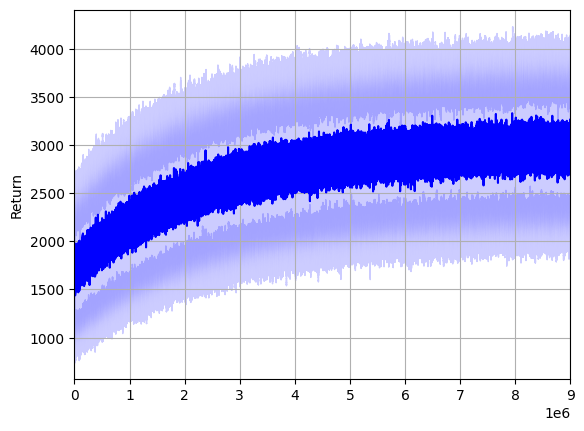

In [ ]:
mean = np.array([np.mean(Rs[i:i+100]) for i in range(len(Rs) - 10)])
std = np.array([np.std(Rs[i:i+100]) for i in range(len(Rs) - 10)])
time = np.arange(mean.size)
plt.plot(mean,color='b',label= "Exp")
plt.fill_between(time, mean - std, mean + std, color='b', alpha=0.2)

plt.xlim(0, max_episodes)
plt.grid()
plt.ylabel("Return")

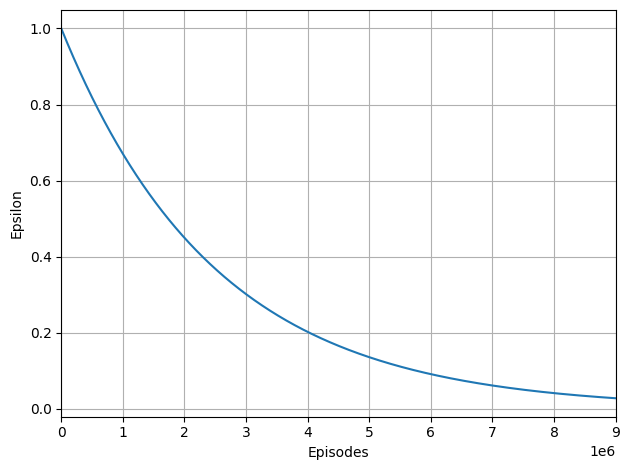

In [ ]:
plt.plot(Eps)
plt.xlim(0, max_episodes)
plt.grid()
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.tight_layout()
plt.show()

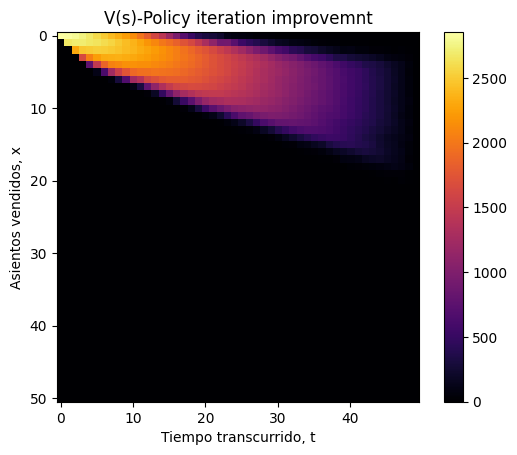

In [ ]:
seats = np.arange(0, C + 1)
time = np.arange(0, T)
matriz = np.zeros((C+1,T))
for idx, (x, t) in enumerate(product(seats, time)):  # Cambia el tamaño de la matriz según sea necesario
    matriz[x,t] = np.max(Q[idx,:])

plt.imshow(matriz, cmap='inferno', interpolation='nearest')
plt.colorbar()  # Agregar barra de colores para referencia
plt.title('V(s)-Policy iteration improvemnt')
plt.xlabel('Tiempo transcurrido, t')
plt.ylabel('Asientos vendidos, x')
plt.show()


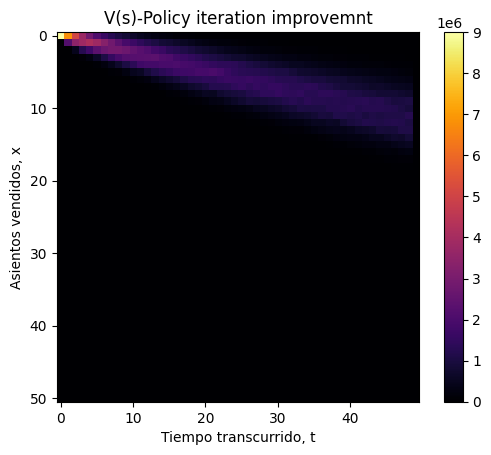

In [ ]:
seats = np.arange(0, C + 1)
time = np.arange(0, T)
matriz = np.zeros((C+1,T))
for idx, (x, t) in enumerate(product(seats, time)):  # Cambia el tamaño de la matriz según sea necesario
    matriz[x,t] = N[idx,:].sum()

plt.imshow(matriz, cmap='inferno', interpolation='nearest')
plt.colorbar()  # Agregar barra de colores para referencia
plt.title('V(s)-Policy iteration improvemnt')
plt.xlabel('Tiempo transcurrido, t')
plt.ylabel('Asientos vendidos, x')
plt.show()